# EDA on Online-Shopping-in-Retail649

### This note will focus on data extraction from AWS RDS database, loaded as a dataframe and cleaned for analysis by transforming column data types and dealing with missing data.

#### The Necessary Imports

In [1]:
from db_utils import RDSDatabaseConnector
from frameinfo import DataFrameInfo
from transformation import DataTransform
import pandas as pd

{'RDS_HOST': 'eda-projects.cq2e8zno855e.eu-west-1.rds.amazonaws.com', 'RDS_PASSWORD': 'EDAonlinecustomer', 'RDS_USER': 'onlinecustomeranalyst', 'RDS_DATABASE': 'web_data', 'RDS_PORT': 5432}
{'RDS_HOST': 'eda-projects.cq2e8zno855e.eu-west-1.rds.amazonaws.com', 'RDS_PASSWORD': 'EDAonlinecustomer', 'RDS_USER': 'onlinecustomeranalyst', 'RDS_DATABASE': 'web_data', 'RDS_PORT': 5432}
Data successfully loaded from customer.csv
   administrative  administrative_duration  informational  \
0             0.0                      0.0              0   
1             0.0                      0.0              0   
2             2.0                     99.4              0   
3             0.0                      0.0              0   
4             0.0                      0.0              0   

   informational_duration  product_related  product_related_duration  \
0                     0.0              4.0                       0.0   
1                     0.0             26.0                     876

In [2]:
example = DataTransform
t = example.testing_import("Testing class from python file is imported to notebook. ")
print(t)

Testing class from python file is imported to notebook. It works


### Describe Columns in the the DataFrame

In [3]:
import pandas as pd
class DataFrameInfo:
    def __init__(self, df):
        """
        Initializes the DataFrameInfo class with a Pandas DataFrame.

        Parameters:
        df (pd.DataFrame): The DataFrame to be analyzed.
        """
        self.df = df

    def describe_columns(self):
        """Describe all columns in the DataFrame to check their data types."""
        description = {
            "Column Name": self.df.columns,
            "Data Type": self.df.dtypes,
            'Non-Null Count': self.df.count(),
            'Unique Count': self.df.nunique()
         } 
        description_df = pd.DataFrame(description)
        return description_df.reset_index(drop=True)

df = pd.read_csv('customer.csv')
df_info = DataFrameInfo(df)
description = df_info.describe_columns()
print(description)

                 Column Name Data Type  Non-Null Count  Unique Count
0             administrative   float64           11760            24
1    administrative_duration   float64           11418          3357
2              informational     int64           12330            13
3     informational_duration   float64           11994          1280
4            product_related   float64           11751           296
5   product_related_duration   float64           12129          3494
6               bounce_rates   float64           12330           613
7                 exit_rates   float64           12330           164
8                page_values   float64           12330           742
9                      month    object           12330            10
10         operating_systems    object           12319             7
11                   browser    object           12330            13
12                    region    object           12330             9
13              traffic_type    ob

### Count Statistical Values

In [4]:
import pandas as pd

class DataFrameInfo:
    def __init__(self, df):
        """
        Initializes the DataFrameInfo class with a Pandas DataFrame.

        Parameters:
        df (pd.DataFrame): The DataFrame to be analyzed.
        """
        self.df = df

    def get_statistical_values(self):
        """
        Extracts statistical values (median, standard deviation, and mean) from the DataFrame.

        Returns:
        pd.DataFrame: A DataFrame containing the median, standard deviation, and mean for numeric columns.
        """
        try:
            numeric_df = self.df.select_dtypes(include=[float, int])
            stats = {
                'Median': numeric_df.median(),
                'Standard Deviation': numeric_df.std(),
                'Mean': numeric_df.mean()
            }
            stats_df = pd.DataFrame(stats)
            return stats_df
        except Exception as e:
            print(f"Error calculating statistical values: {e}")
            return None

df = pd.read_csv('customer.csv')
df_info = DataFrameInfo(df)
print(df_info.get_statistical_values())

                            Median  Standard Deviation         Mean
administrative              1.0000            3.364905     2.308844
administrative_duration     6.0000          179.392485    84.539079
informational               0.0000            1.174194     0.497080
informational_duration      0.0000          136.201557    34.486687
product_related            18.0000           44.597841    32.814824
product_related_duration  586.0000         1767.243802  1192.426086
bounce_rates                0.0035            0.048847     0.022381
exit_rates                  0.0250            0.048578     0.042820
page_values                 0.0000           17.397345     5.556310


### Count Distinct Values

In [5]:
import pandas as pd
class DataFrameInfo:
    def __init__(self, df):
        """
        Initializes the DataFrameInfo class with a Pandas DataFrame.

        Parameters:
        df (pd.DataFrame): The DataFrame to be analyzed.
        """
        self.df = df

def count_distinct_values(df):
        """
        Counts distinct values in categorical columns of a DataFrame.

        Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

        Returns:
        pd.Series: A series where the index is the column names and the values are the counts of distinct values.
        """
        # Identifying categorical columns
        categorical_columns = df.select_dtypes(include=['object', 'category']).columns

        # Counting distinct values in each categorical column
        distinct_counts = df[categorical_columns].nunique()

        return distinct_counts


df = pd.read_csv('customer.csv')
df_info = DataFrameInfo(df)
distinct_counts = count_distinct_values(df)
print(distinct_counts)

month                10
operating_systems     7
browser              13
region                9
traffic_type         19
visitor_type          3
dtype: int64


### Print Shape of the DataFrame

In [6]:
df = pd.read_csv('customer.csv')
df_info = DataFrameInfo(df)
print(" Shape of DataFrame:", df.shape)

 Shape of DataFrame: (12330, 17)


### Generate a Count of NULL Values in each Column

In [7]:
df = pd.read_csv('customer.csv')
df_info = DataFrameInfo(df)
counts = df.isna().sum()
print(counts.sort_values())
percentages = round(df.isna().mean() * 100, 4)
print(percentages.sort_values())

page_values                   0
visitor_type                  0
traffic_type                  0
region                        0
browser                       0
month                         0
weekend                       0
revenue                       0
bounce_rates                  0
informational                 0
exit_rates                    0
operating_systems            11
product_related_duration    201
informational_duration      336
administrative              570
product_related             579
administrative_duration     912
dtype: int64
page_values                 0.0000
visitor_type                0.0000
traffic_type                0.0000
region                      0.0000
browser                     0.0000
month                       0.0000
weekend                     0.0000
revenue                     0.0000
bounce_rates                0.0000
informational               0.0000
exit_rates                  0.0000
operating_systems           0.0892
product_related_duratio

### Generate Percentage Count of NULL Values in each Column

In [8]:
null_values = pd.concat([counts, percentages], axis=1, keys=["count", "%"])
print(null_values)

                          count       %
administrative              570  4.6229
administrative_duration     912  7.3966
informational                 0  0.0000
informational_duration      336  2.7251
product_related             579  4.6959
product_related_duration    201  1.6302
bounce_rates                  0  0.0000
exit_rates                    0  0.0000
page_values                   0  0.0000
month                         0  0.0000
operating_systems            11  0.0892
browser                       0  0.0000
region                        0  0.0000
traffic_type                  0  0.0000
visitor_type                  0  0.0000
weekend                       0  0.0000
revenue                       0  0.0000


### View the first 5 rows of the columns to determine where to impute the Data

In [9]:
df = pd.read_csv('customer.csv')
df.head(5)

,administrative,administrative_duration,informational,informational_duration,product_related,product_related_duration,bounce_rates,exit_rates,page_values,month,operating_systems,browser,region,traffic_type,visitor_type,weekend,revenue
0,0.0,0.0,0,0.0,4.0,0.0,0.2000,0.200,0.0,May,Android,Google Chrome,North America,Twitter,Returning_Visitor,False,False
1,0.0,0.0,0,0.0,26.0,876.0,0.0000,0.026,0.0,Nov,Windows,Google Chrome,Western Europe,Google search,Returning_Visitor,True,False
2,2.0,99.4,0,0.0,19.0,368.0,0.0396,0.052,0.0,Sep,Windows,Google Chrome,Asia,Twitter,Returning_Visitor,False,False
3,0.0,0.0,0,0.0,20.0,1432.0,0.0248,0.028,1.8,Dec,Windows,Google Chrome,Western Europe,Instagram ads,Returning_Visitor,False,True
4,0.0,0.0,0,0.0,33.0,694.0,0.0141,0.032,0.0,May,Android,Google Chrome,North America,Instagram ads,Returning_Visitor,False,False


### Percentage of Null Values 

In [10]:
print('percentage of null values in each column:')
df.isnull().sum()/len(df)

percentage of null values in each column:


administrative              0.046229
administrative_duration     0.073966
informational               0.000000
informational_duration      0.027251
product_related             0.046959
product_related_duration    0.016302
bounce_rates                0.000000
exit_rates                  0.000000
page_values                 0.000000
month                       0.000000
operating_systems           0.000892
browser                     0.000000
region                      0.000000
traffic_type                0.000000
visitor_type                0.000000
weekend                     0.000000
revenue                     0.000000
dtype: float64

### Let's check if Product Related Duration data are normally distributed.

In [11]:
from scipy.stats import normaltest

# Assume df is your DataFrame and 'column' is the column you want to test
data = df['product_related_duration']


# D’Agostino’s K^2 Test
stat, p = normaltest(data, nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=9577.284, p=0.000


### Our test seems to suggest that the data are not normally distributed. Therefore, a p-value of 0 means that the null hypothesis cannot be true. In practice, such a thing doesn't happen but we should probably take a look ourselves!

### Histogram to see the data distribution of Product Related Duration

<Axes: >

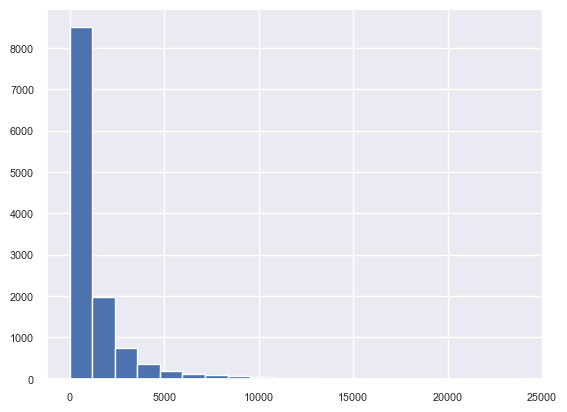

In [38]:
df['product_related_duration'].hist(bins=20)

### Q-Q plot to see the data distribution of Product Related Duration

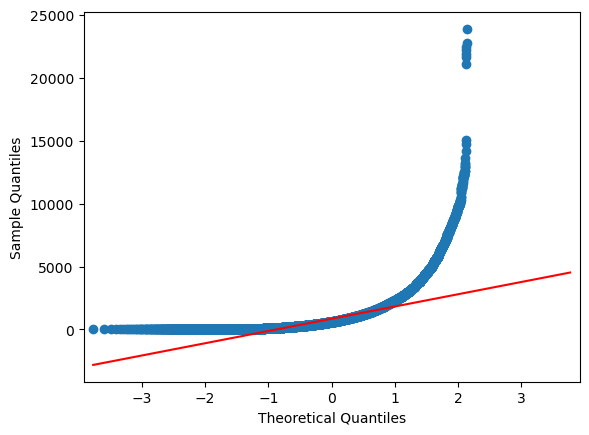

In [13]:
# q-q plot of product_related_duration':
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


# Product Related Duration: 


qq_plot = qqplot(df['product_related_duration'] , scale=1 ,line='q')
pyplot.show()

In [14]:
print(f'The median of product_related_duration is {df["product_related_duration"].median()}')
print(f'The mean of product_related_duration is {df["product_related_duration"].mean()}')


The median of product_related_duration is 586.0
The mean of product_related_duration is 1192.426086239591


### The large difference between the mean and the median from the test suggests that the distribution of product_related_duration is likely skewed, with the presence of outliers pulling the mean up.

### In this case, the median is the better choice for imputation because it will provide a more representative value for the central tendency of the data, avoiding the influence of any extreme values or outliers.
### Let's pick the median in this case, and impute those values:

In [15]:
df['product_related_duration'] = df['product_related_duration'].fillna(df['product_related_duration'].median())

In [16]:
print('percentage of null values in each column:')
df.isnull().sum()/len(df)

percentage of null values in each column:


administrative              0.046229
administrative_duration     0.073966
informational               0.000000
informational_duration      0.027251
product_related             0.046959
product_related_duration    0.000000
bounce_rates                0.000000
exit_rates                  0.000000
page_values                 0.000000
month                       0.000000
operating_systems           0.000892
browser                     0.000000
region                      0.000000
traffic_type                0.000000
visitor_type                0.000000
weekend                     0.000000
revenue                     0.000000
dtype: float64

### Let's check if informational duration data are normally distributed.

In [17]:
from scipy.stats import normaltest

# Assume df is your DataFrame and 'column' is the column you want to test
data = df['informational_duration']


# D’Agostino’s K^2 Test
stat, p = normaltest(data, nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=15327.017, p=0.000


### Histogram to see the data distribution of Informational Duration

<Axes: >

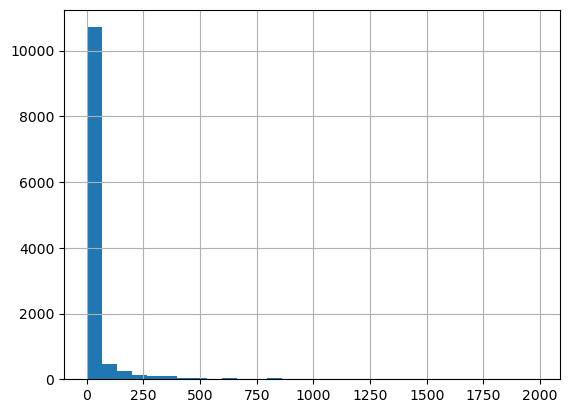

In [18]:
df['informational_duration'].hist(bins=30)

### Q-Q plot to see the data distribution of informational duration

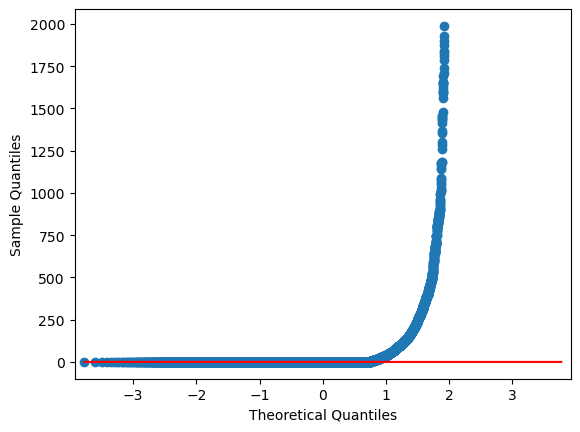

In [19]:
# q-q plot of HouseAge:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


# scaleHouseAge: 


qq_plot = qqplot(df['informational_duration'] , scale=1 ,line='q')
pyplot.show()

In [20]:
print(f'The median of informational_duration is {df["informational_duration"].median()}')
print(f'The mean of informational_duration is {df["informational_duration"].mean()}')


The median of informational_duration is 0.0
The mean of informational_duration is 34.4866873744639


### Given the significant difference between the mean and the median, it suggests the presence of skewness in the informational_duration data. Imputing with the median (0.0) would maintain the current distribution, which seems to have a strong skew towards zero.
### Let's pick the median in this case, and impute those values:

In [21]:
df['informational_duration'] = df['informational_duration'].fillna(df['informational_duration'].median())

In [22]:
print('percentage of null values in each column:')
df.isnull().sum()/len(df)

percentage of null values in each column:


administrative              0.046229
administrative_duration     0.073966
informational               0.000000
informational_duration      0.000000
product_related             0.046959
product_related_duration    0.000000
bounce_rates                0.000000
exit_rates                  0.000000
page_values                 0.000000
month                       0.000000
operating_systems           0.000892
browser                     0.000000
region                      0.000000
traffic_type                0.000000
visitor_type                0.000000
weekend                     0.000000
revenue                     0.000000
dtype: float64

###  Let's check if Administrative duration data are normally distributed.

In [23]:
from scipy.stats import normaltest

# Assume df is your DataFrame and 'column' is the column you want to test
data = df['administrative_duration']


# D’Agostino’s K^2 Test
stat, p = normaltest(data, nan_policy='omit')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=10874.548, p=0.000


### Histogram to see the data distribution of Administrative Duration

<Axes: >

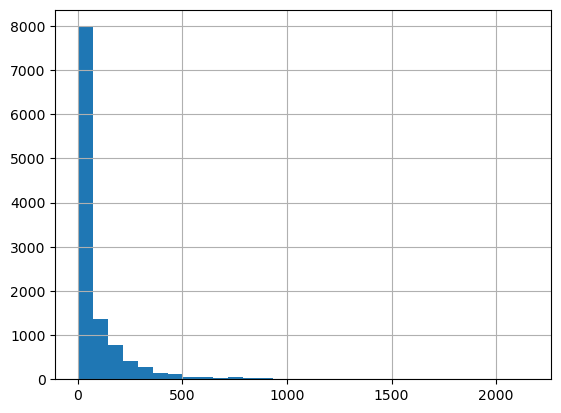

In [24]:
df['administrative_duration'].hist(bins=30)

### Q-Q plot to see the data distribution of Administrative duration

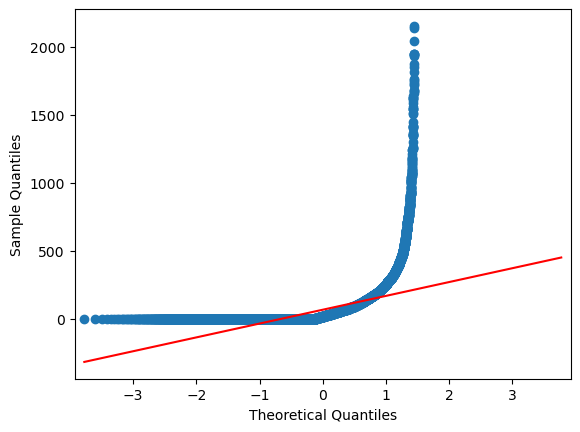

In [25]:
# q-q plot of Administrative_duration:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


# scale Administrative_duration: 


qq_plot = qqplot(df['administrative_duration'] , scale=1 ,line='q')
pyplot.show()

In [26]:
print(f'The median of administrative_duration is {df["administrative_duration"].median()}')
print(f'The mean of administrative_duration is {df["administrative_duration"].mean()}')


The median of administrative_duration is 6.0
The mean of administrative_duration is 84.53907895798476


### Given the significant difference between the mean and the median, it suggests the presence of skewness in the administrative_duration data. Imputing with the median (0.0) would maintain the current distribution, which seems to have a strong skew towards zero.
### Let's pick the median in this case, and impute those values:

In [27]:
df['administrative_duration'] = df['administrative_duration'].fillna(df['administrative_duration'].median())

In [28]:
print('percentage of null values in each column:')
df.isnull().sum()/len(df)

percentage of null values in each column:


administrative              0.046229
administrative_duration     0.000000
informational               0.000000
informational_duration      0.000000
product_related             0.046959
product_related_duration    0.000000
bounce_rates                0.000000
exit_rates                  0.000000
page_values                 0.000000
month                       0.000000
operating_systems           0.000892
browser                     0.000000
region                      0.000000
traffic_type                0.000000
visitor_type                0.000000
weekend                     0.000000
revenue                     0.000000
dtype: float64

In [29]:
import pandas as pd
class DataFrameTransform:
    def __init__(self, df):
        """
        Initializes the DataFrameInfo class with a Pandas DataFrame.

        Parameters:
        df (pd.DataFrame): The DataFrame to be analyzed.
        """
        self.df = df

def handle_null_values_with_median(df, column):
    """
    Fills null values in a specified column with the median of that column.

    Parameters:
    df (pd.DataFrame): The DataFrame to process.
    column (str): The name of the column to handle null values for.

    Returns:
    pd.DataFrame: The DataFrame with null values filled.
    """
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)
    return df

df = pd.read_csv('customer.csv')
df = handle_null_values_with_median(df, 'product_related_duration')
df['product_related_duration'] = df['product_related_duration'].fillna(df['product_related_duration'].median())

<Axes: >

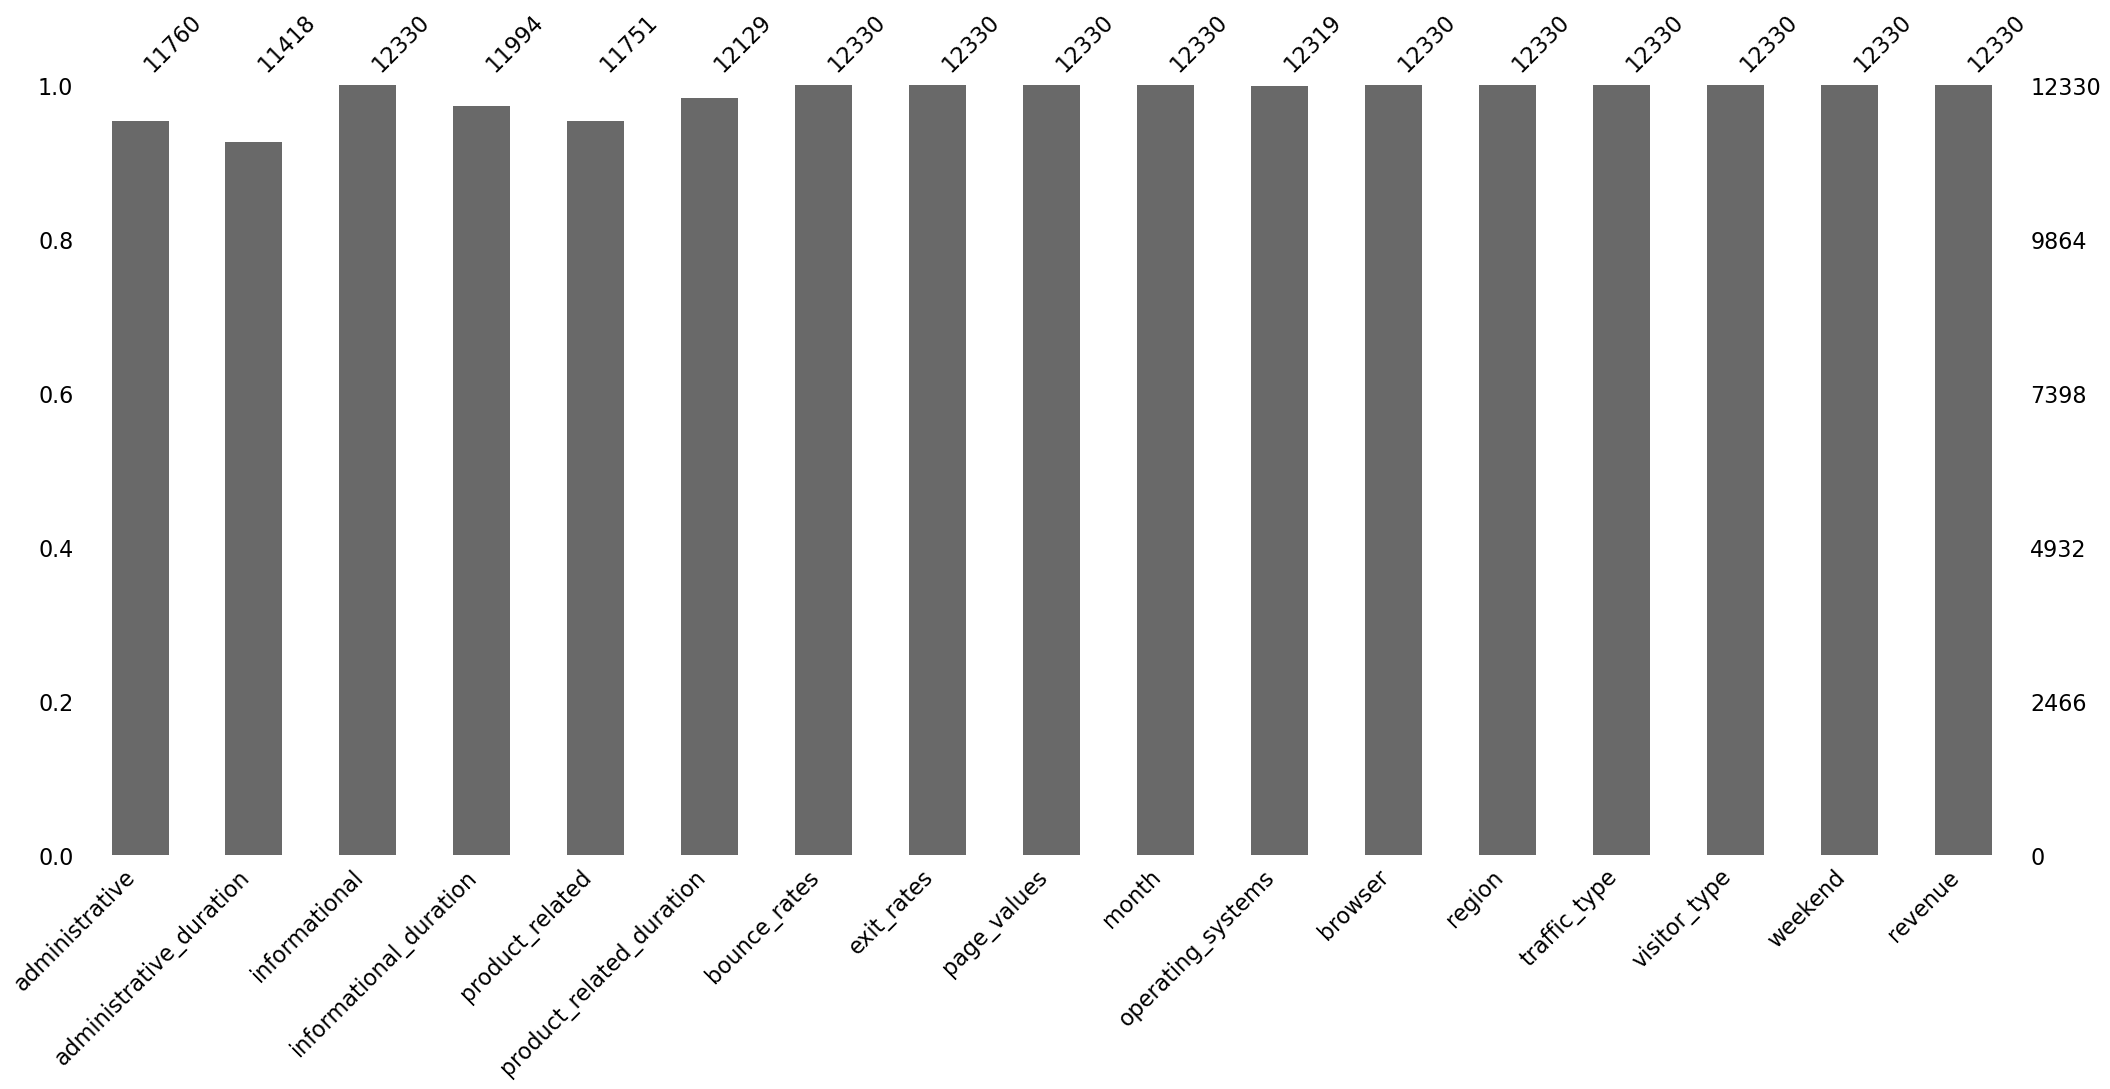

In [30]:


# Program to visualize missing values in dataset 
  
# Importing the libraries 
import pandas as pd 
import missingno as msno 
  
# Loading the dataset 
df = pd.read_csv('customer.csv') 
  
# Visualize the number of missing 
# values as a bar chart 
msno.bar(df) 


### Checking the Distribution

#### The next main stage of the EDA pipeline is to check our variables for skewness.  Let's take a general look at the insights of the distributions for continuous and ordinal data. Features from the column list are selected and an histogram is applied with KDE to each using Seaborn's FacetGrid class.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

['product_related_duration']


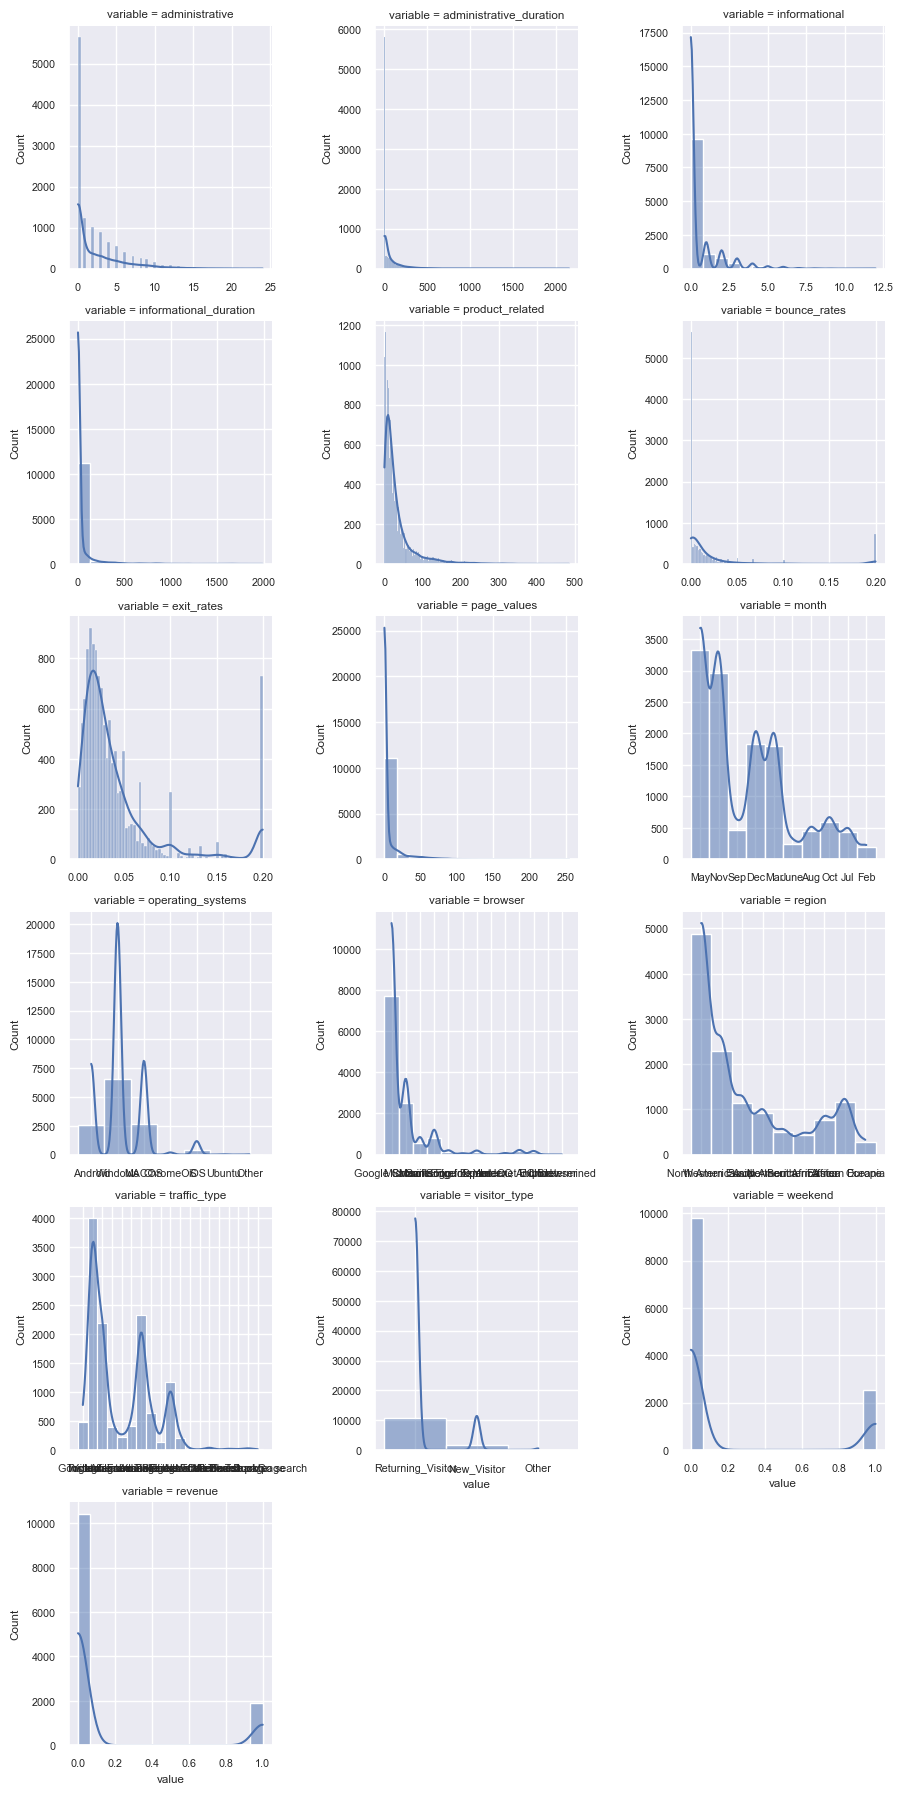

In [31]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import pandas as pd
import seaborn as sns

numeric_features = ['administrative',
                    'administrative_duration',
                    'informational',
                    'informational_duration',
                    'product_related',
                    'bounce_rates',
                    'exit_rates',
                    'page_values',
                    'month',
                    'operating_systems',
                    'browser',
                    'region',
                    'traffic_type',
                    'visitor_type',
                    'weekend',
                    'revenue'
                    ]        

categorical_features = [col for col in df.columns if col not in numeric_features]
sns.set(font_scale=0.7)
f = pd.melt(df, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

print(categorical_features)

#### Insight from the Facetgridplot:

#### Weekend and revenue look strongly autocorrelated and the variables appear to be right-skewed as well including other values apart from operating systems which look normally distributed, but hard to correct as the dispersion is small and the values are categorical. Administrative, administrative_duration, informational, informational_duration, product_related, and page_values appear right-skewed with a long tail of high values.

